<a href="https://colab.research.google.com/github/MahmoudAlsayes/pythonProject/blob/master/08_introduction_to_nlp_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundamentals in Tensorflow

In [ ]:
## Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-62b59986-b02d-d6b3-8739-46278756df4d)


In [ ]:
## Get helper function
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-09-23 13:56:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-09-23 13:56:40 (77.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import helper function
from helper_functions import unzip_data,create_tensorboard_callback , plot_loss_curves ,compare_historys

## Get a text dataset


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2024-09-23 13:56:51--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 74.125.143.207, 173.194.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  1.26MB/s    in 0.5s    

2024-09-23 13:56:52 (1.26 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
unzip_data("nlp_getting_started.zip")

## Visualizing a text dataset


In [ ]:
import pandas as pd
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [ ]:
# Shuffle training dataframe
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# what does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of eatch class ?
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [ ]:
# How many total samples?
len(train_df),len(test_df)

(7613, 3263)

In [ ]:
# Let's viualize some random training examples
import random
random_index=random.randint(0,len(train_df)-5 )
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _,text,target=row
  print(f"Target:{target}","(real diaster) " if target >0 else "(not real diaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target:1 (real diaster) 
Text:
An outbreak of Legionnaires' disease in New York has killed at least 8 people ÛÓ now officials think they've fo... http://t.co/7evyeLW4LC

---

Target:0 (not real diaster)
Text:
Enter the world of extreme diving ÛÓ 9 stories up and into the Volga River http://t.co/7adqV1gRVR

---

Target:0 (not real diaster)
Text:
Mr. T stopped wearing gold chains in 2005 because he thought it would be an insult to the people who lost everything after Hurricane Katrina

---

Target:1 (real diaster) 
Text:
Detonate (feat. M.O.P.) by Apollo Brown http://t.co/fllaBzGCRc

---

Target:0 (not real diaster)
Text:
NowPlaying GT &amp; Wildfire feat. Freaks In Love Feels Like It Should (Original Mix) Massive Dance Radio ListenLive: http://t.co/ANoDGXZR3E

---



### Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split training data into training and validation sets
train_sentences , val_sentences , train_labels,val_labels =train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
# check the lengths
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
len(train_df_shuffled)

7613

In [ ]:
# check the first 10
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Convert text into numbers

### Text Vectorization (tokenization)

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use the *default* TextVectorization parameters
text_vactorizer= TextVectorization(max_tokens=None,# how many words in the vocabulary (automaticlly add <OOV>)
                                   standardize="lower_and_strip_punctuation",
                                   split="whitespace",
                                   ngrams=None, # Create groups of n-words ?
                                   output_mode="int", # how to map tokens to numbers
                                   output_sequence_length=None ,#how long do you wnat your sequences to be ?
                                  #  pad_to_max_tokens=True
                                   )

In [ ]:
len(train_sentences[0].split())

7

In [ ]:
# Find the average number of tokens(words) in the training tweets
round(sum([len(i.split())for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup test vectorization variables
max_vocab_length=1000
max_length=15
text_vactorizer=TextVectorization(max_tokens=max_vocab_length,
                                  output_mode="int",
                                  output_sequence_length=max_length,
                                  )

In [ ]:
# Fit the text vectorizer to the training
text_vactorizer.adapt(train_sentences)

In [ ]:
# Create a samplde sentence and tokenize it
sample_sentence="Ther's a flood in my street!"

text_vactorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  1,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
## Choose a random sentace from the traininf dataset and tokanize it
random_sentence=random.choice(train_sentences)
print(f"Original text : \n {random_sentence}\
        \n\n vectorized version : ")
text_vactorizer([random_sentence])

Original text : 
 Investigators have said a Virgin Galactic spaceship crash was caused by structural failure after the co-pilot unlocked a braking system        

 vectorized version : 


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[420,  24, 205,   3, 868,   1,   1,  85,  23, 585,  18, 384, 320,
         43,   2]])>

In [ ]:
# Get the uniqie words in the vocubulary
words_in_vocab= text_vactorizer.get_vocabulary() # Get all of the unique words in our trainind data
top_5_words=words_in_vocab[:5] # get the most common words
bottom_5_words=words_in_vocab[-5:]# get the least common words
print(f"Number of words in vocab:{len(words_in_vocab)}")
print(f"5 most common words : {top_5_words}")
print(f"5 least common words : {bottom_5_words}")

Number of words in vocab:1000
5 most common words : ['', '[UNK]', 'the', 'a', 'in']
5 least common words : ['reported', 'r', 'pray', 'playlist', 'patience']


### Creating an Embedding using an Embedding layer

In [ ]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length, # set the input shape
                             output_dim=128, # output shape
                             embeddings_initializer="uniform",
                             input_length=max_length,# how long is eatch input
                             )
embedding


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<Embedding name=embedding, built=False>

In [ ]:
# Get random sentense from the training set
random_sentence=random.choice(train_sentences)
print(f"Orignal text : \n {random_sentence}\
\n\n Embedded version ")
# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed=embedding(text_vactorizer([random_sentence]))
sample_embed

Orignal text : 
 @GraysonDolan only if u let me drown you ??

 Embedded version 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04006081, -0.02199074, -0.03371878, ...,  0.03381369,
          0.01157387,  0.02167429],
        [ 0.0049639 ,  0.04142142,  0.03400612, ..., -0.03963754,
          0.00545889,  0.01678481],
        [ 0.0492116 ,  0.03836712, -0.0042391 , ..., -0.02809439,
         -0.02349304, -0.01414645],
        ...,
        [-0.03490151,  0.03683448,  0.02204377, ..., -0.04807955,
          0.03214736, -0.01465834],
        [-0.03490151,  0.03683448,  0.02204377, ..., -0.04807955,
          0.03214736, -0.01465834],
        [-0.03490151,  0.03683448,  0.02204377, ..., -0.04807955,
          0.03214736, -0.01465834]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0],sample_embed[0][0].shape,random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.04006081, -0.02199074, -0.03371878, -0.02680607, -0.01900002,
        -0.01956416,  0.02140769,  0.04491993, -0.04337952,  0.04807055,
         0.04135301, -0.02507338,  0.00606573,  0.02506654, -0.03466028,
         0.03057444, -0.01497128, -0.00071915,  0.00958805,  0.00809259,
        -0.01131939,  0.00995224,  0.01917026,  0.03033132,  0.00395267,
         0.04906351, -0.00074816,  0.04768673,  0.01522413,  0.00217453,
        -0.03964953, -0.03432298, -0.01480378, -0.03333037,  0.04312203,
        -0.03205891,  0.03128136, -0.0407606 , -0.0187765 , -0.03388333,
         0.03627833, -0.03557209,  0.02953882,  0.03208822, -0.03985981,
        -0.03435408,  0.01433409, -0.04382935, -0.02780726, -0.03614523,
        -0.04397136,  0.02063363,  0.00891352,  0.04432734,  0.03497619,
        -0.01256477, -0.0433545 , -0.03953214, -0.04300587,  0.00584935,
        -0.02882245, -0.02010663,  0.02540353, -0.00148062, -0.04332022,
  

## Modelling a text dataset (runing series of experiments)
* Model 0 : Naive Bayes (baseline) , this is from Sklearn ML
* Model 1 : Feed-forward neurl network (dense model)
* Model 2 : LSTM model (RNN)
* Model 3 : GRU model (RNN)
* Model 4 :Bidirectional-LSTM model (RNN)
* Model 5 : 1D Convoutional Neural Network (CNN)
* Model 6 : TensorFlow Hub Pretrained Feature Ectractor (using transfer learning for NLP )
* Model 7: Same as model 6 with 10% of training data


Steps in modelling with tensorflow :
* Create a model
* Build a model
* Fit a model
* Evaluate our model

### Model 0 : Getting a baseline


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0=Pipeline([
    ("tfidf",TfidfVectorizer()),# convert words to numbers using tfidf
    ("clf",MultinomialNB())# model the text
])

# Fit the pipleine to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score=model_0.score(val_sentences,val_labels)
print(f"Our baseline model achieves an accuracy of : {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of : 79.27%


In [ ]:
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [ ]:
# Make predictions
baseline_preds=model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
train_labels

array([0, 0, 1, ..., 1, 1, 0])

### Createing an evaluation function for our model experiment

In [ ]:
# Function to evaluate : accuracy , precision , recall , f1-score
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calculate_results(y_true,y_pred):
  # Calculate model accuracy
  model_accuracy=accuracy_score(y_true,y_pred)*100
  # Calculate model precision , recall and f1-score using "weighted" average
  model_preicison ,model_recall , model_f1, _ = precision_recall_fscore_support(y_true,y_pred, average="weighted")
  model_result={"accuracy" : model_accuracy,
                "precision":model_preicison,
                "recall":model_recall,
                "f1":model_f1}
  return model_result

In [ ]:
# Get baseline result
baseline_result=calculate_results(y_true=val_labels,
                                  y_pred=baseline_preds)
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1 : A simple dense model

In [ ]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback
# Create a directory to save TensorBoard logs
SAVE_DIR="model_logs"

In [ ]:
# Build model woth Functional API
from tensorflow.keras import layers
SAVE_DIR="model_logs"
inputs=layers.Input(shape=(1,),dtype=tf.string) # inputs are 1-dimensional strings

x = text_vactorizer(inputs) # turn the input text into numbers

x= embedding(x)# Create an embedding of the numberized inputs
x= layers.GlobalAveragePooling1D()(x)

outputs=layers.Dense(1,activation="sigmoid")(x)# Condense the feature vector for eatch token to one vector # Create the output layer , want binary outputs so use sigmoid activation function

model_1=tf.keras.Model(inputs,outputs,name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,129 (500.50 KB)

 Trainable params: 128,129 (500.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_1_history=model_1.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                   experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20240923-135700
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.6277 - loss: 0.6523 - val_accuracy: 0.7310 - val_loss: 0.5575
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7676 - loss: 0.5101 - val_accuracy: 0.7625 - val_loss: 0.5062
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8062 - loss: 0.4436 - val_accuracy: 0.7769 - val_loss: 0.4892
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8228 - loss: 0.4116 - val_accuracy: 0.7808 - val_loss: 0.4881
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8270 - loss: 0.3841 - val_accuracy: 0.7730 - val_loss: 0.4888


In [ ]:
# Check the results
model_1.evaluate(val_sentences,val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7670 - loss: 0.5122


[0.48879867792129517, 0.7729659080505371]

In [ ]:
# Make some predictions and evaluate
model_1_pred_probs= model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


(762, 1)

In [ ]:
# Look at the first predictions
model_1_pred_probs[0]

array([0.5332073], dtype=float32)

In [ ]:
# Convert model predcition probabilities to label format
model_1_preds=tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [ ]:
# calculate or model_1 results
model_1_results=calculate_results(y_true=val_labels,
                                  y_pred=model_1_preds)
model_1_results

{'accuracy': 77.29658792650919,
 'precision': 0.7763206990944375,
 'recall': 0.7729658792650919,
 'f1': 0.7701512125975899}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_result.values()))


array([False, False, False, False])

## Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab=text_vactorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[:10]

(1000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
max_vocab_length

1000

In [ ]:
# model 1 summary
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 384,389 (1.47 MB)

 Trainable params: 128,129 (500.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 256,260 (1001.02 KB)

In [ ]:
# Get the weight matrixs of embedding layer
embed_weights=model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)

(1000, 128)


In [ ]:
# Create embedding files (we got this from TensorFlow's word embeddings doucument)
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
# else:
  # files.download("embedding_vectors.tsv")
  # files.download("embedding_metadata.tsv")

## Recurrent Neural Networks (RNN's)

### Model 2 : LSTM
LSTM = long short term memory ( one of the most popular LSTM cells )

`
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)
`


In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs= layers.Input(shape=(1,),dtype=tf.string)
x=text_vactorizer(inputs)
x=embedding(x)
# print(x.shape)
# x=layers.LSTM(units=64,return_sequences=True)(x)
# print(x.shape)
x=layers.LSTM(64)(x)
# print(x.shape)
# x=layers.Dense(64,activation="relu")(x)
# print(x.shape)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_2=tf.keras.Model(inputs,outputs,name="model_2_LSTM")


In [ ]:
# Get summary
model_2.summary()

Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177,473 (693.25 KB)

 Trainable params: 177,473 (693.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_2_history=model_2.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20240923-135731
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7875 - loss: 0.4553 - val_accuracy: 0.7769 - val_loss: 0.5091
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8380 - loss: 0.3702 - val_accuracy: 0.7756 - val_loss: 0.4755
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8432 - loss: 0.3642 - val_accuracy: 0.7612 - val_loss: 0.4927
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8513 - loss: 0.3518 - val_accuracy: 0.7717 - val_loss: 0.4867
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8604 - loss: 0.3312 - val_accuracy: 0.7664 - val_loss: 0.5167


In [ ]:
# Make a prediction with LSTM model
model_2_pred_probs=model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


array([[0.7777878 ],
       [0.78366834],
       [0.9903094 ],
       [0.10971568],
       [0.12353414],
       [0.99835736],
       [0.97539777],
       [0.9190962 ],
       [0.79272103],
       [0.19623582]], dtype=float32)

In [ ]:
# Convert model 2 pred probs to labels
model_2_preds=tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 2 result
model_2_results=calculate_results(y_true=val_labels,y_pred=model_2_preds)
model_2_results

{'accuracy': 76.64041994750657,
 'precision': 0.7663548384223465,
 'recall': 0.7664041994750657,
 'f1': 0.7653289711694428}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 3: GRU


In [ ]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vactorizer(inputs)
x=embedding(x)
x=layers.GRU(64)(x)
# print(x.shape)
# x=layers.GRU(64,return_sequences=True)(x) # if you want to stack recurrent layers on top of eatch  other , you need return_sequences=True
# print(x.shape)
# x=layers.LSTM(42,return_sequences=True)(x)
# print(x.shape)
# x=layers.GRU(99)(x)
# print(x.shape)
# x=layers.Dense(64,activation="relu")(x)
## x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_3=tf.keras.Model(inputs,outputs,name="model_3_GRU")

In [ ]:
# Get summary
model_3.summary()

Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165,313 (645.75 KB)

 Trainable params: 165,313 (645.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#  Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit
model_3_history=model_3.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20240923-135757
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7810 - loss: 0.4590 - val_accuracy: 0.7743 - val_loss: 0.5099
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8613 - loss: 0.3302 - val_accuracy: 0.7743 - val_loss: 0.5416
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8737 - loss: 0.3131 - val_accuracy: 0.7651 - val_loss: 0.5510
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8818 - loss: 0.2859 - val_accuracy: 0.7598 - val_loss: 0.5593
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8814 - loss: 0.2829 - val_accuracy: 0.7598 - val_loss: 0.6141


In [ ]:
# Make some prediction
model_3_pred_probs=model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[0.89976054],
       [0.8873606 ],
       [0.99172556],
       [0.04425154],
       [0.08793337],
       [0.99890137],
       [0.9924104 ],
       [0.95784235],
       [0.8171122 ],
       [0.08646277]], dtype=float32)

In [ ]:
# Convert model 3 pred probs to labels
model_3_preds=tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 3 result
model_3_result=calculate_results(y_true=val_labels,y_pred=model_3_preds)
model_3_result

{'accuracy': 75.98425196850394,
 'precision': 0.7610616087083465,
 'recall': 0.7598425196850394,
 'f1': 0.7577317717227482}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 4 : Bidirectional RNN

In [ ]:
# Build a bidirectional RNN in TensorFlow
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vactorizer(inputs)
x=embedding(x)
# x=layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
# print(x.shape)
x =layers.Bidirectional(layers.LSTM(64))(x)
# print(x.shape)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_4=tf.keras.Model(inputs,outputs,name="model_4_bidirectional")

In [ ]:
model_4.summary()

Model: "model_4_bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 226,945 (886.50 KB)

 Trainable params: 226,945 (886.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_4_history=model_4.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20240923-135819
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8383 - loss: 0.3985 - val_accuracy: 0.7690 - val_loss: 0.5865
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8822 - loss: 0.2918 - val_accuracy: 0.7546 - val_loss: 0.5660
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8974 - loss: 0.2597 - val_accuracy: 0.7402 - val_loss: 0.6148
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9016 - loss: 0.2389 - val_accuracy: 0.7507 - val_loss: 0.7233
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9064 - loss: 0.2308 - val_accuracy: 0.7480 - val_loss: 0.8037


In [ ]:
# Make prediction with our bidirectional model
model_4_pred_probs=model_4.predict(val_sentences)
model_4_pred_probs[:5]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


array([[0.7819471 ],
       [0.65359205],
       [0.99698263],
       [0.03188589],
       [0.11919461]], dtype=float32)

In [ ]:
model_4_preds=tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 1., 1., 0., 0.], dtype=float32)>

In [ ]:
# Calculate model_4 result of our bidirectioonal model
model_4_result=calculate_results(val_labels,model_4_preds)
model_4_result

{'accuracy': 74.80314960629921,
 'precision': 0.7486643020241665,
 'recall': 0.7480314960629921,
 'f1': 0.7460227626560917}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Convoluation Neural Network for text (and other typed of sequences)

### Model 5: Conv1D


In [ ]:
# Test out our embedding layer , conv1D layer and max pooling
from tensorflow.keras import layers
embedding_test=embedding(text_vactorizer(["this is a text sentence"])) # turn target sequence into embedding

conv_1d= layers.Conv1D(filters=32,
                      kernel_size=5,# this is also referred to as an ngram of 5 (meaning it looks at 5 words at time)
                      strides=1,# default
                      activation="relu",
                      padding="same")# default="valid" , the output is smaller than the input shape , "same" mean output is same shape as input
conv_1d_output=conv_1d(embedding_test) # pass test embedding through conv1d layer

max_pool=layers.GlobalMaxPool1D()
max_pool_output=max_pool(conv_1d_output) # equivalent to "get the most important feature" or get the features with the hights value

embedding_test.shape , conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [ ]:
# embedding_test

In [ ]:
# conv_1d_output[:5]

In [ ]:
# max_pool_output

In [ ]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vactorizer(inputs)
x=embedding(x)
x=layers.Conv1D(filters=64,
                kernel_size=5,
                strides=1,
                activation="relu",
                padding="valid")(x)
x=layers.GlobalMaxPool1D()(x)
# x=layer.Dense(64,activation="relu")(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_5=tf.keras.Model(inputs,outputs,name="model_5_conv1D")
# Compile
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Get a summary of out conv1D model
model_5.summary()

Model: "model_5_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 11, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 169,089 (660.50 KB)

 Trainable params: 169,089 (660.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_sentences[0]

'@mogacola @zamtriossu i screamed after hitting tweet'

In [ ]:
#  Fit the model
model_5_history=model_5.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   "Conv1D"
                                                                   )])

Saving TensorBoard log files to: model_logs/Conv1D/20240923-135833
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8234 - loss: 0.4102 - val_accuracy: 0.7664 - val_loss: 0.5438
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8569 - loss: 0.3433 - val_accuracy: 0.7664 - val_loss: 0.5604
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8656 - loss: 0.3177 - val_accuracy: 0.7546 - val_loss: 0.5887
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8863 - loss: 0.2848 - val_accuracy: 0.7520 - val_loss: 0.6301
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9017 - loss: 0.2485 - val_accuracy: 0.7585 - val_loss: 0.6576


In [ ]:
model_5.evaluate

<bound method TensorFlowTrainer.evaluate of <Functional name=model_5_conv1D, built=True>>

In [ ]:
# make prediction
model_5_pred_probs=model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[0.9668547 ],
       [0.5188392 ],
       [0.9527606 ],
       [0.05789629],
       [0.1171874 ],
       [0.9999398 ],
       [0.655824  ],
       [0.9916881 ],
       [0.4657777 ],
       [0.08895271]], dtype=float32)

In [ ]:
# Convert model_5  pred probs to labels
model_5_preds=tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 0., 0.], dtype=float32)>

In [ ]:
# result
model_5_result=calculate_results(val_labels,model_1_preds)
model_5_result

{'accuracy': 77.29658792650919,
 'precision': 0.7763206990944375,
 'recall': 0.7729658792650919,
 'f1': 0.7701512125975899}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 6: TensorFlow Hub Pretrained Sentence Extractor


In [ ]:
# https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2
# https://www.kaggle.com/models/google/universal-sentence-encoder/tensorFlow2/universal-sentence-encoder

In [ ]:
sample_sentence

"Ther's a flood in my street!"

In [ ]:
import tensorflow_hub as hub
embed=hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2")
embed_samples=embed([sample_sentence,
                     "when you can the universal sentence encoder on a sentense , it turns into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[ 0.00972922  0.0152755   0.04457943 -0.01875536  0.01634292  0.09147221
  0.03058978  0.04727529 -0.00123936  0.01493027  0.01114879 -0.00321548
  0.00220334  0.04750107  0.05032578 -0.01455864  0.02625525 -0.0425748
 -0.00131458 -0.06401613  0.01887744  0.03020126  0.01983047 -0.0301681
 -0.01630196 -0.06222312  0.04950508 -0.02671489 -0.03311418 -0.00395214
 -0.04767469  0.05515165 -0.04530904  0.0499053   0.02344064 -0.08109511
  0.03149733  0.03786038 -0.01242787 -0.08951052 -0.00362    -0.01100005
 -0.02673907  0.00251191 -0.10308652 -0.04317512 -0.01258619 -0.02572375
 -0.05649404  0.02557135], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
# Create model using the Sequential API
import tf_keras
model_6 = tf_keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  tf_keras.layers.Dense(64, activation="relu"),
  tf_keras.layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf_keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history=model_6.fit(train_sentences,train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            )

Epoch 1/5
215/215 [==============================] - 9s 16ms/step - loss: 0.5041 - accuracy: 0.7851 - val_loss: 0.4583 - val_accuracy: 0.7953
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4143 - accuracy: 0.8168 - val_loss: 0.4359 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4006 - accuracy: 0.8227 - val_loss: 0.4323 - val_accuracy: 0.8084
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3934 - accuracy: 0.8279 - val_loss: 0.4289 - val_accuracy: 0.8176
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3855 - accuracy: 0.8305 - val_loss: 0.4257 - val_accuracy: 0.8084


In [ ]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Make predictions with USE TF Hub Model
model_6_pred_probs=model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 11ms/step


array([[0.22142565],
       [0.7979621 ],
       [0.99135965],
       [0.21046741],
       [0.7655917 ],
       [0.8067509 ],
       [0.9867822 ],
       [0.9856838 ],
       [0.9547844 ],
       [0.10360917]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_6_preds=tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calcualte model 6 performence metrics
model_6_results = calculate_results(val_labels,model_6_preds)
model_6_results

{'accuracy': 80.83989501312337,
 'precision': 0.8083015191282908,
 'recall': 0.8083989501312336,
 'f1': 0.8078938824042212}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
len(train_df_shuffled)

7613

In [ ]:
7613/10

761.3

### Model 7: TF hub Pretrained USE but with 10% of training data

In [ ]:
## NOTE: Making data spilts like below leads to data leakage (model_7 trained on 10% data,outperforms model_6 trained on 100% data)
## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET

# # Create subset of 10% of the training data
# train_10_percent = train_df_shuffled[["text","target"]].sample(frac=0.1,random_state=42)
# # len(train_10_percent)
# train_sentences_10_percent=train_10_percent["text"].to_list()
# train_labels_10_percent=train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [ ]:
# Making a better dataset split (no data leakage)
train_10_percent_split=int(0.1*len(train_sentences))
train_sentences_10_percent=train_sentences[:train_10_percent_split]
train_sentences_10_labels=train_labels[:train_10_percent_split]

In [ ]:
# Check the number of eatch updeted training data subsets
pd.Series(np.array(train_sentences_10_labels)).value_counts()

,count
0,406
1,279


In [ ]:
# Check the number of targets in our subset of data
# train_10_percent["target"].value_counts()

In [ ]:
# Let's build a model the same model 6
# model_7=tf_keras.models.clone_model(model_6) <-------------- clone

import tf_keras
model_7 = tf_keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  tf_keras.layers.Dense(64, activation="relu"),
  tf_keras.layers.Dense(1, activation="sigmoid")
], name="model_7_USE")


# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf_keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
# Fit the model
model_7_history=model_7.fit(train_sentences_10_percent,train_sentences_10_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            )

Epoch 1/5
22/22 [==============================] - 2s 42ms/step - loss: 0.6712 - accuracy: 0.6715 - val_loss: 0.6433 - val_accuracy: 0.7651
Epoch 2/5
22/22 [==============================] - 0s 21ms/step - loss: 0.5968 - accuracy: 0.8088 - val_loss: 0.5846 - val_accuracy: 0.7808
Epoch 3/5
22/22 [==============================] - 1s 42ms/step - loss: 0.5218 - accuracy: 0.8088 - val_loss: 0.5299 - val_accuracy: 0.7808
Epoch 4/5
22/22 [==============================] - 1s 36ms/step - loss: 0.4607 - accuracy: 0.8248 - val_loss: 0.5015 - val_accuracy: 0.7808
Epoch 5/5
22/22 [==============================] - 1s 50ms/step - loss: 0.4194 - accuracy: 0.8336 - val_loss: 0.4869 - val_accuracy: 0.7835


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs=model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 11ms/step


array([[0.20873997],
       [0.6382102 ],
       [0.9408271 ],
       [0.35320595],
       [0.51627266],
       [0.6957893 ],
       [0.9026204 ],
       [0.82073414],
       [0.86014366],
       [0.19007856]], dtype=float32)

In [ ]:
#turn pred probs into labels
model_7_preds=tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# make a result
model_7_result=calculate_results(val_labels,model_7_preds)
model_7_result

{'accuracy': 78.34645669291339,
 'precision': 0.7838253488437648,
 'recall': 0.7834645669291339,
 'f1': 0.7823247172223685}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Comparing the performance of eatch of our models

In [ ]:
# Combine model results into a DataFrame
all_model_result=pd.DataFrame({"0_baseline":baseline_result,
                               "1_simple_dense": model_1_results,
                               "2_LSTM":model_2_results,
                               "3_gru":model_3_result,
                               "4_bidirectional": model_4_result,
                               "5_conv1D":model_5_result,
                               "6_tf_hub_use_encoder":model_6_results,
                               "7_tf_hub_use_encoder_10_percent":model_7_result})
all_model_result=all_model_result.transpose()
all_model_result

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,77.296588,0.776321,0.772966,0.770151
2_LSTM,76.640420,0.766355,0.766404,0.765329
3_gru,75.984252,0.761062,0.759843,0.757732
4_bidirectional,74.803150,0.748664,0.748031,0.746023
5_conv1D,77.296588,0.776321,0.772966,0.770151
6_tf_hub_use_encoder,80.839895,0.808302,0.808399,0.807894
7_tf_hub_use_encoder_10_percent,78.346457,0.783825,0.783465,0.782325


In [ ]:
# Reduce the accuracy to the same scale as other metrics
all_model_result["accuracy"]=all_model_result["accuracy"]/100
# all_model_result

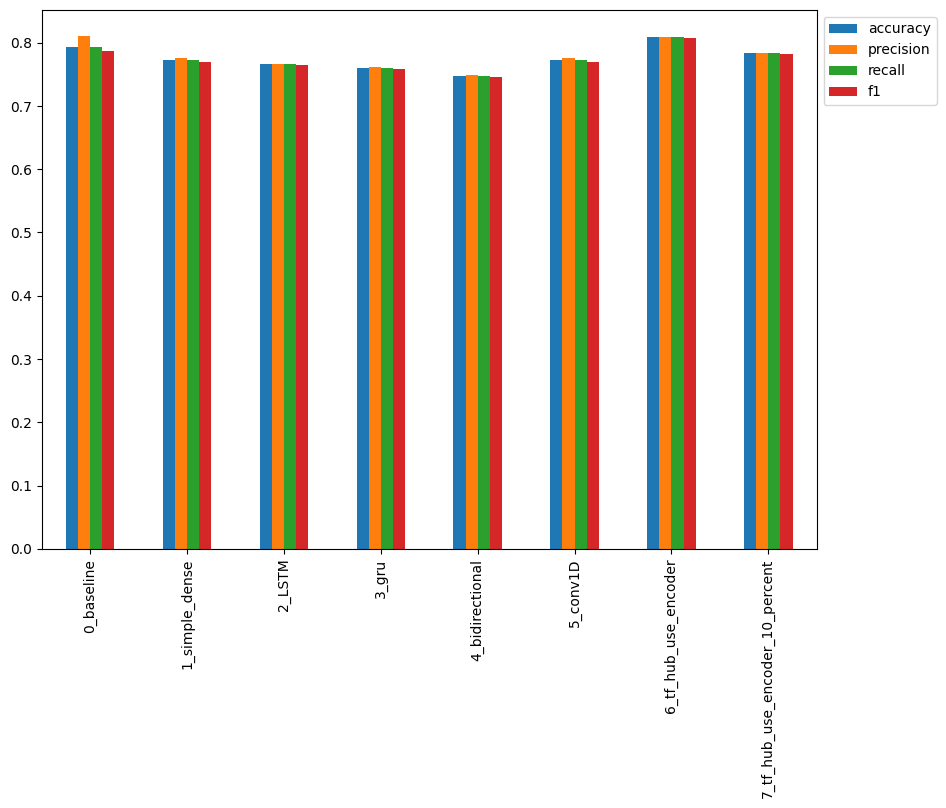

In [ ]:
# Plot and compare all of the model results
all_model_result.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

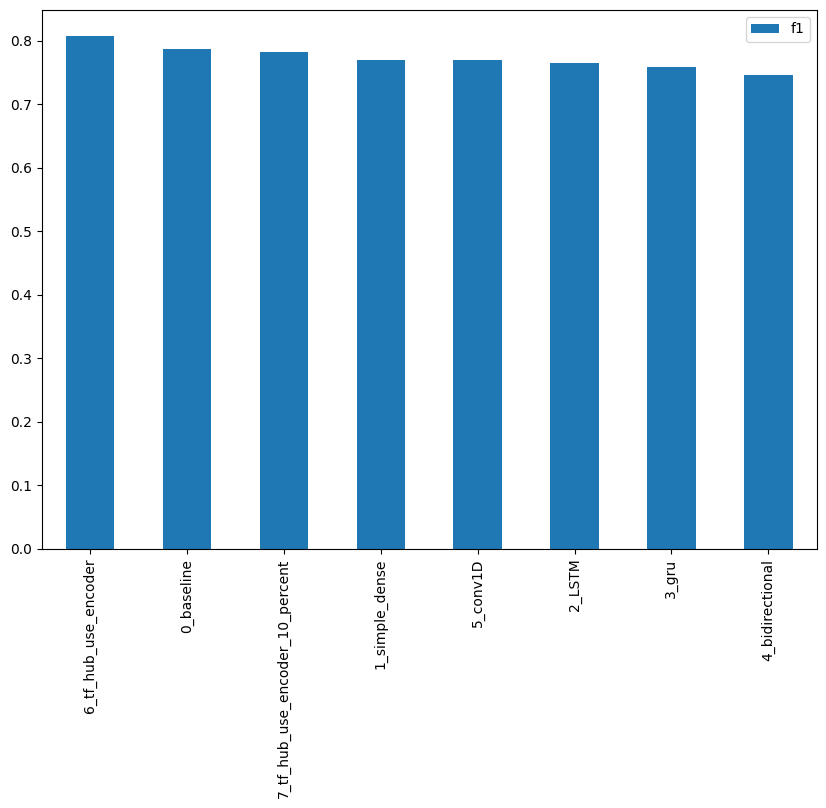

In [ ]:
# Sort model result by f1-score
all_model_result.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7)).legend();

## Saving and loading a trained model

In [ ]:
# Save to HDF5
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load model
loaded_model_6=tf_keras.models.load_model("model_6.h5",
                                          custom_objects={"KerasLayer":hub.KerasLayer})

In [ ]:
#
loaded_model_6_pred_probs=loaded_model_6.predict(val_sentences)
loaded_model_6_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.22142565],
       [0.7979622 ],
       [0.99135965],
       [0.21046741],
       [0.7655916 ],
       [0.80675095],
       [0.9867822 ],
       [0.9856838 ],
       [0.9547844 ],
       [0.10360917]], dtype=float32)

In [ ]:
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4257 - accuracy: 0.8084


[0.42565274238586426, 0.808398962020874]

In [ ]:
model_6_results

{'accuracy': 80.83989501312337,
 'precision': 0.8083015191282908,
 'recall': 0.8083989501312336,
 'f1': 0.8078938824042212}

In [ ]:
# Save TF Hub Sentece Encoder model to saevModel
model_6.save("model_6_SaveModel_format")

In [ ]:
# Load in a model from the SaveModel format
loaded_model_6_SavedModel_format =tf_keras.models.load_model("model_6_SaveModel_format")

In [ ]:
loaded_model_6_SavedModel_format.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 19ms/step - loss: 0.4257 - accuracy: 0.8084


[0.42565274238586426, 0.808398962020874]

## Finding the most wrong examples

In [ ]:
# Create DataFrame with validation sentences and best performing model predictions
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2024-09-23 14:01:07--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.207, 142.250.153.207, 142.250.145.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  35.5MB/s    in 33s     

2024-09-23 14:01:41 (27.4 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables

In [ ]:
# Import previously trained model from Google Storage
model_6_pretrained =tf_keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
# Make predictions with the loaded model from GS
model_6_pretrained_pred_probs=model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds=tf.squeeze(tf.round(model_6_pretrained_pred_probs))

24/24 [==============================] - 1s 9ms/step


In [ ]:
# Create DataFrame with validation sentences and best performing model predictions
val_df=pd.DataFrame({"text":val_sentences,
                     "target":val_labels,
                     "pred": model_6_pretrained_preds,
                     "pred_prob":tf.squeeze(model_6_pretrained_pred_probs)})

val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong=val_df[val_df["target"]!= val_df["pred"]].sort_values("pred_prob",ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [ ]:
most_wrong.tail()

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043919
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [ ]:
model_6_pretrained_result=calculate_results(val_labels,model_6_pretrained_preds)

In [ ]:
# check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples():
  _,text,target,pred,pred_prob=row
  print(f"Target: {target},pred: {pred},Prob: {pred_prob}")
  print(f"Text:\n {text}\n")
  print("----\n")

Target: 0,pred: 1.0,Prob: 0.9101957678794861
Text:
 ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0,pred: 1.0,Prob: 0.8769821524620056
Text:
 FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0,pred: 1.0,Prob: 0.8523001074790955
Text:
 @noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0,pred: 1.0,Prob: 0.8354544043540955
Text:
 Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0,pred: 1.0,Prob: 0.8272132277488708
Text:
 @AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0,pred: 1.0,Prob: 0.814815878868103
Text:
 @SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Targ

In [ ]:
# check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[-10:].itertuples():
  _,text,target,pred,pred_prob=row
  print(f"Target: {target},pred: {pred},Prob: {pred_prob}")
  print(f"Text:\n {text}\n")
  print("----\n")

Target: 1,pred: 0.0,Prob: 0.06730346381664276
Text:
 @DavidVonderhaar At least you were sincere ??

----

Target: 1,pred: 0.0,Prob: 0.05507583171129227
Text:
 @willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1,pred: 0.0,Prob: 0.054603397846221924
Text:
 Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1,pred: 0.0,Prob: 0.054597001522779465
Text:
 going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1,pred: 0.0,Prob: 0.049637261778116226
Text:
 You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1,pred: 0.0,Prob: 0.04391850158572197
Text:
 @SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1,pred: 0.0,Prob: 0.0420868

In [ ]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


## Making prediction on the test dataset

In [ ]:
# Making prediction on test dataset and visulaizing them
test_sentences=test_df["text"].to_list()
test_samples = random.sample(test_sentences,10)
for test_sample in test_samples :
  pred_prob=tf.squeeze(model_6_pretrained.predict([test_sample])) # our model expects a list as input
  pred=tf.round(pred_prob)
  print(f"Pred: {int(pred)},Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 67ms/step
Pred: 0,Prob: 0.12628202140331268
Text:
HELP ME I'M SINKING

----

1/1 [==============================] - 0s 34ms/step
Pred: 0,Prob: 0.41937822103500366
Text:
Tried 2 4get
Feelings of death
Invading panic spawns
Can't concentrate
No 1 relates
Stealing all the light
Spreading thin a soul in sections

----

1/1 [==============================] - 0s 32ms/step
Pred: 0,Prob: 0.11604578047990799
Text:
@pukesmoothie I don't understand WHY he would put us in that danger.

----

1/1 [==============================] - 0s 40ms/step
Pred: 0,Prob: 0.08404462784528732
Text:
#website #hosting Get blazing speeds professional management and unlimited options @nyndesigns http://t.co/d1F7wi7FMr

----

1/1 [==============================] - 0s 34ms/step
Pred: 0,Prob: 0.45623913407325745
Text:
Demolition underway on @OU_Football stadium project. Stay updated throughout at http://t.co/ju09z2y7g0 http://t.co/UP0hOCgGrj

----

1/1 [==========================

## Test with random masseage

In [ ]:
tessst_pred_prob=model_6_pretrained.predict(["when i was in the street i saw a cat and sudennly i saw a fire in the hose so i call the police and the fighter arrive and the fire calm down and the ambulace come and save the pepole how was in the fire home"])

1/1 [==============================] - 0s 42ms/step


In [ ]:
tessst_pred_prob


array([[0.58204967]], dtype=float32)

In [ ]:
tessst_preds=tf.round(tessst_pred_prob)
tessst_preds

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

## The speed/score tradeoff

In [ ]:
model_6_results

{'accuracy': 80.83989501312337,
 'precision': 0.8083015191282908,
 'recall': 0.8083989501312336,
 'f1': 0.8078938824042212}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
# Let's make a function to measure the time of prediction
import time
def pred_time(model,samples):
  """
  times how lon a model takes to make a predictions on samples.

  """
  start_time=time.perf_counter() # get start time
  model.predict(samples)
  end_time=time.perf_counter()
  total_time=end_time-start_time # Calculate how long predictios took to make
  time_per_pred = total_time/len(samples)
  return total_time,time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_toal_pred_time,model_6_time_per_pred=pred_time(model_6_pretrained,
                                                       val_sentences)

24/24 [==============================] - 0s 10ms/step


In [ ]:
model_6_toal_pred_time,model_6_time_per_pred

(0.3342639779999672, 0.0004386666377952326)

In [ ]:
# Calculate our baseline model times per pred
baseline_total_pred_time,baseline_time_per_pred=pred_time(model_0,
                                                          val_sentences)

In [ ]:
baseline_total_pred_time,baseline_time_per_pred

(0.016589471000031608, 2.177095931762678e-05)

In [ ]:
model_6_pretrained_results=calculate_results(y_true=val_labels,
                                            y_pred=model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

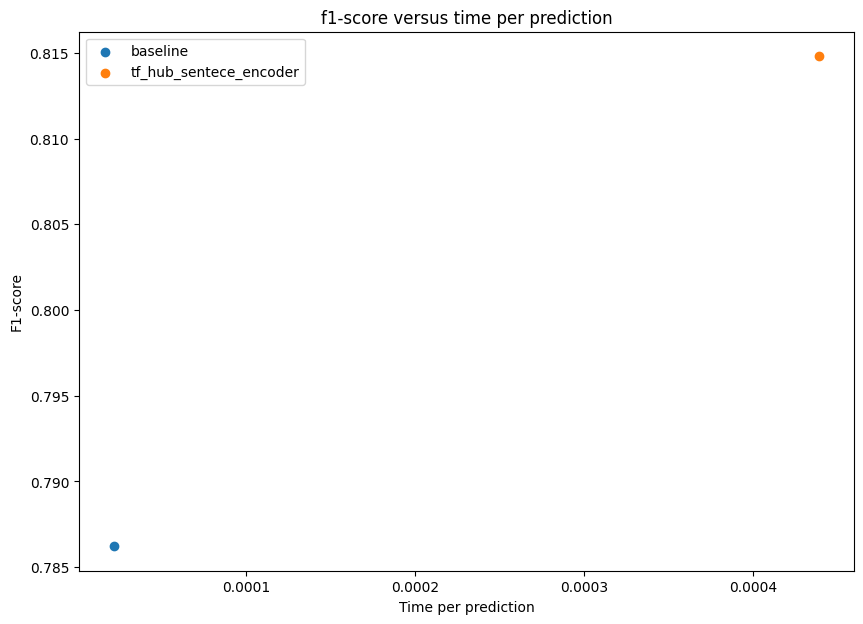

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred,baseline_result["f1"],label="baseline")
plt.scatter(model_6_time_per_pred,model_6_pretrained_result["f1"],label="tf_hub_sentece_encoder")
plt.legend()
plt.title("f1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score");